<a href="https://colab.research.google.com/github/richeym-umich/workshops/blob/main/Machine_Learning_Tools_and_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Scikit-Learn Example
In the following example, we'll go through importing some python libraries and working with a provided dataset to demonstrate a simple computer vision problem

To start, we'll import some essential libraries for visualizing our results and working with provided datasets. Note that we also import an svm classifier.

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()

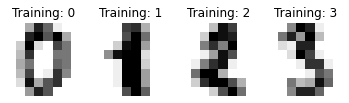

In [23]:
_, axes = plt.subplots(1,4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image,label) in zip(axes[:], images_and_labels[:4]):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title('Training: %i' % label)

In [12]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [13]:
classifier = svm.SVC(gamma=.001)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
predicted = classifier.predict(x_test)

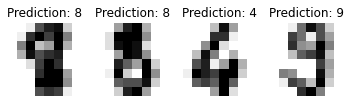

In [22]:
_, axes = plt.subplots(1,4)
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[:], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

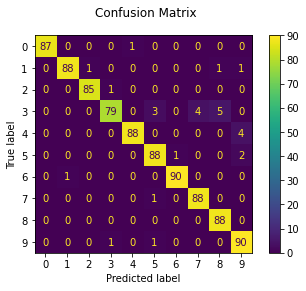

In [19]:
print('Classification report for classifier %s:\n%s\n' % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, x_test, y_test)
disp.figure_.suptitle('Confusion Matrix')
print('Confusion matrix:\n%s' % disp.confusion_matrix)
plt.show()